In [ ]:
# Library yang digunakan
import matplotlib.pyplot as plt
import numpy as np
import matplotlib.image as mpimg

from matplotlib.animation import FuncAnimation
from IPython import display
from matplotlib.offsetbox import OffsetImage, AnnotationBbox

In [ ]:
# Parameter tetap
M  = 100      # Panjang lintasan yang dapat ditempati oleh mobil
p  = 0.3      # Kemungkinan mobil menginjak rem
v0 = 0        # Kecepatan awal (tidak terlalu dibutuhkan untuk Tugas ini)
d  = 1        # Jarak aman (biasanya ga boleh <0 karena ga mungkin mobil nya nabrak)
N = 20        # banyak mobil
tmax = 100    # lama iterasi berlangsung
vmax = 5      # kecepatan maksimum

In [ ]:
!gdown --id 1d4ckKrIKOx_SpQzwGMYLErHNDVVw2a9H

/usr/local/lib/python3.7/dist-packages/gdown/cli.py:131: FutureWarning: Option `--id` was deprecated in version 4.3.1 and will be removed in 5.0. You don't need to pass it anymore to use a file ID.
  category=FutureWarning,
Downloading...
From: https://drive.google.com/uc?id=1d4ckKrIKOx_SpQzwGMYLErHNDVVw2a9H
To: /content/Mobil Fadhlan.png
100% 76.1k/76.1k [00:00<00:00, 42.9MB/s]


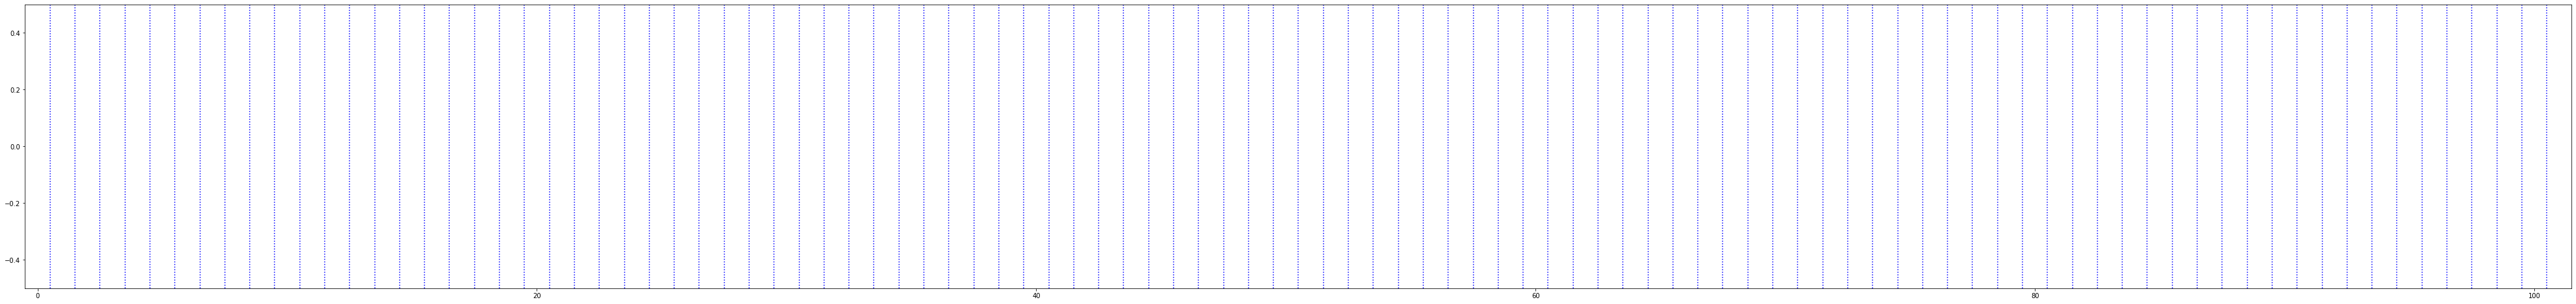

In [ ]:
# Read gambar mobil untuk di simulasikan
img = mpimg.imread('Mobil Fadhlan.png')

# Pembuatan box image agar bisa sesuai ukuran grapich
image_box = OffsetImage(img, zoom=0.1)

# Pembuatan grapich/plot simulasi biasanya berukuran M+1 atau M
fig, ax = plt.subplots(1,1,figsize=(70, 8))

# function pembuatan plot simulasi
def plotLine():
  [ax.axvline(x=k+0.5, color='b', linestyle='dotted') for k in range(0,M+1)]
  ax.set_xlim(-0.5,M+1.5)
  ax.set_ylim(-0.5,0.5)

plotLine()

In [180]:
# Array Kosong pembuatan tempat untuk penyimpanan posisi mobil kemana
arrLine = [[k,l] for (k,l) in zip(range(M),np.zeros(M))]

# Penempatan titik tempat mobil secara random dari 1 sampai 100 titik
posisi = np.sort(np.random.choice(range(len(arrLine)), N, replace=False))

# Pembuatan var v untuk memudahkan dalam perpindahan kecepatan titik mobil pada array
v = np.zeros(N)

# Pembuatan var waktu untuk menghitung rata rata mobil kembali ke posisi awal
posawal = []
posawal.extend([100] * N)
waktu = np.zeros(N)

In [ ]:
# Function updating posisi standar
def update_posisiSTD(x):
  for l in range(N):
    # Perhitungan jarak antar current mobil dan mobil selanjutnya
    current_pos= posisi[0]
    if (l == (N-1)):
      distance = (current_pos-posisi[l])%len(posisi)
    else:
      distance =  (posisi[l+1]-posisi[l])%len(posisi)

    # Perhitungan update kecepatan
    if np.random.uniform() < p:
      v[l] = max(min(v[l]+1,vmax,distance-1)-1,0)
    else:
      v[l] = min(v[l]+1,vmax,distance-1)

    # Penjumlahan banyaknya posisi maju + kecepatan
    forward_pos = (posisi[l] + v[l])%len(arrLine)
    door = True
    if (posawal[l] >= 0 and door == True ):
      posawal[l] = posawal[i] - forward_pos
      waktu[l]+=1
    else:
      door = False
    posisi[l] = forward_pos
  return posisi

In [ ]:
# Function updating posisi for simulastion frame
def update_posisi(x):
  for l in range(N):
    # Perhitungan jarak antar current mobil dan mobil selanjutnya
    current_pos= posisi[0]
    if (l == (N-1)):
      distance = (current_pos-posisi[l])%len(posisi)
    else:
      distance =  (posisi[l+1]-posisi[l])%len(posisi)

    # Perhitungan update kecepatan
    if np.random.uniform() < p:
      v[l] = max(min(v[l]+1,vmax,distance-1)-1,0)
    else:
      v[l] = min(v[l]+1,vmax,distance-1)

    # Penjumlahan banyaknya posisi maju + kecepatan
    forward_pos = (posisi[l] + v[l])%len(arrLine)
    posisi[l] = forward_pos
  return posisi

In [ ]:
# Function simulasi mobil
def animasiMP4(frame):
  pos = update_posisi(frame)
  ax.clear()
  plotLine()
  for k in pos:
    simulation = AnnotationBbox(image_box, arrLine[k], frameon=False)
    ax.add_artist(simulation)
   
simulasi = FuncAnimation(fig, animasiMP4, frames=tmax, interval=300)

In [ ]:
# Animasi simulasi dari Nagel Schreckenberg Model
video = simulasi.to_html5_video();
html = display.HTML(video)
display.display(html)
plt.close()

Text(0, 0.5, 'Banyak Mobil')

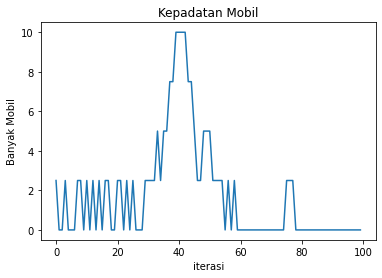

In [ ]:
# Perhitungan kepadatan mobil selama iterasi berjalan
density = []
for i in range(tmax):
  pos = update_posisiSTD(i)
  density.append((np.count_nonzero((pos < 10) & (pos > 5))/(10-6))*10)
plt.plot(range(tmax), density)
plt.title('Kepadatan Mobil')
plt.xlabel('iterasi')
plt.ylabel('Banyak Mobil')

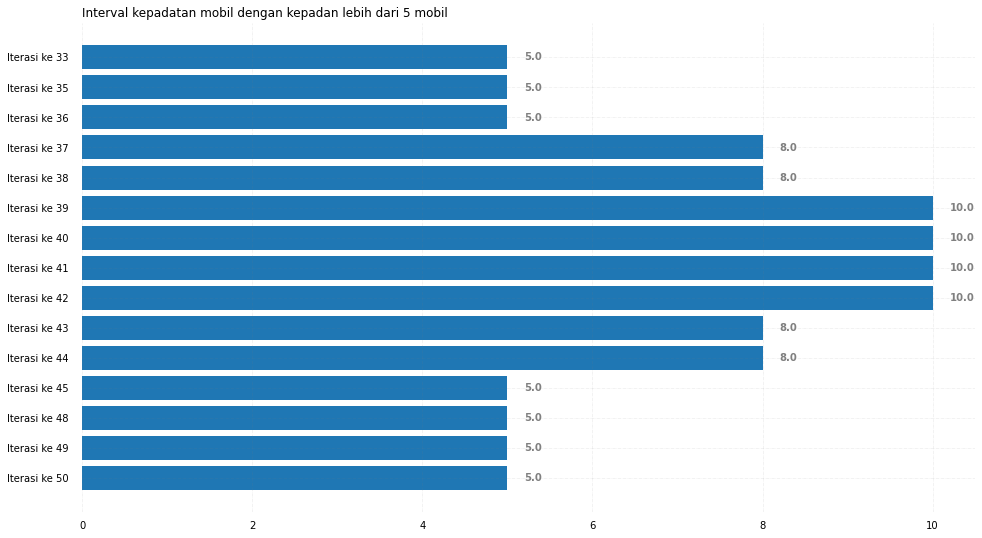

In [ ]:
# Kepadatan maksimum persatuan waktu dengan interval 5 mobil
densityBig5 = []
indexBig5 = []
for i in range(len(density)):
  if ( density[i] >= 5 ):
    densityBig5.append(np.round(density[i]))
    temp = str(i)
    temp = "Iterasi ke "+temp
    indexBig5.append(temp)

# Plot untuk memudahkan mengetahui kepadan dengan interval 5 mobil
fig, ax = plt.subplots(figsize =(16, 9))
ax.barh(indexBig5, densityBig5)
for s in ['top', 'bottom', 'left', 'right']:
    ax.spines[s].set_visible(False)
ax.xaxis.set_ticks_position('none')
ax.yaxis.set_ticks_position('none')
ax.xaxis.set_tick_params(pad = 5)
ax.yaxis.set_tick_params(pad = 10)
ax.grid(b = True, color ='grey',
        linestyle ='-.', linewidth = 0.5,
        alpha = 0.2)
ax.invert_yaxis()
for i in ax.patches:
    plt.text(i.get_width()+0.2, i.get_y()+0.5,
             str(round((i.get_width()), 2)),
             fontsize = 10, fontweight ='bold',
             color ='grey')
ax.set_title('Interval kepadatan mobil dengan kepadan lebih dari 5 mobil',
             loc ='left', )
plt.show()

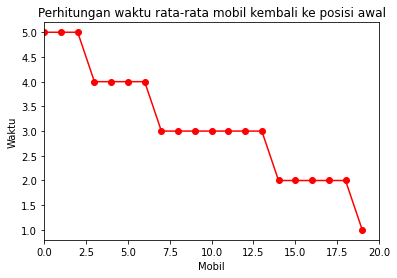

In [ ]:
# Plot perhitungan waktu mobil kembali ke posisi awal

plt.plot(waktu, color='red', marker='o')
plt.title('Perhitungan waktu rata-rata mobil kembali ke posisi awal')
plt.xlabel('Mobil')
plt.ylabel('Waktu')
plt.xlim([0, 20])
plt.show()

In [ ]:
# Perhitungan rata rata mobil kembali ke posisi awal
print("Jumlah mobil : ", N)
print("Total waktu yang dibutuhkan seluruh mobil kembali ke posisi awal : ", sum(waktu), "seconds")
print("Rata rata waktu mobil kembali ke posisi awal : ", sum(waktu)/N, "seconds")

Jumlah mobil :  20
Total waktu yang dibutuhkan seluruh mobil kembali ke posisi awal :  74.0 seconds
Rata rata waktu mobil kembali ke posisi awal :  3.7 seconds
